In [115]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt

from tabulate import tabulate


In [116]:
# Read dataframe from csv file
file = "./data/processed_data/2010-2023_NSS_filtered_vF.csv"
df = pd.read_csv(file)

<Axes: >

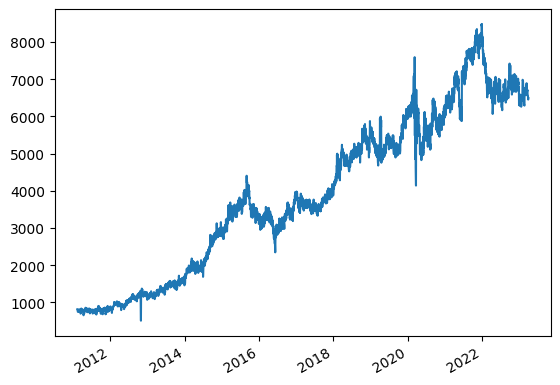

In [117]:
# Turn the date column into a datetime object
df["Quote_date"] = pd.to_datetime(df["Quote_date"])

# Filter after 2011-02-11
df = df[df["Quote_date"] > "2011-02-11"]

# Plot number of options per day
df["Quote_date"].value_counts().plot()

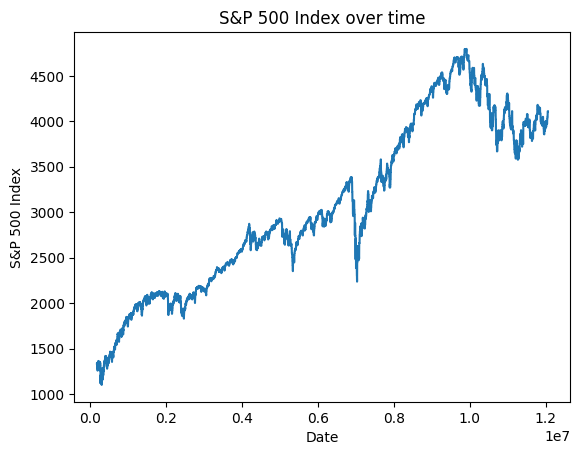

In [118]:
# Plot the underlying_last at different dates
df["Underlying_last"].plot()

# Add labels
plt.xlabel("Date")
plt.ylabel("S&P 500 Index")
plt.title("S&P 500 Index over time")

# Show plot
plt.show()

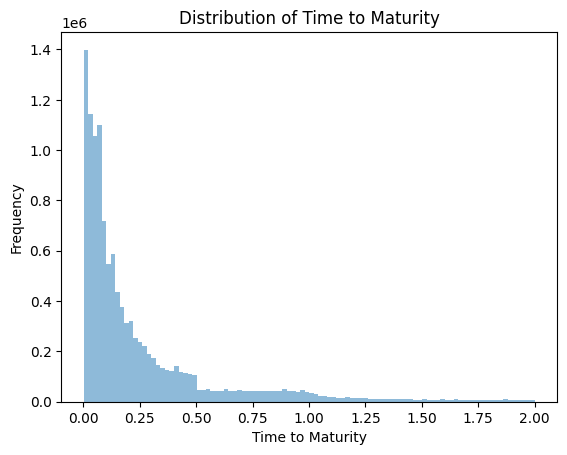

In [119]:
# Plot distribution of TTM
df['TTM'].plot.hist(bins=100, alpha=0.5)
# Add labels
plt.xlabel("Time to Maturity")
plt.ylabel("Frequency")
plt.title("Distribution of Time to Maturity")
plt.show()

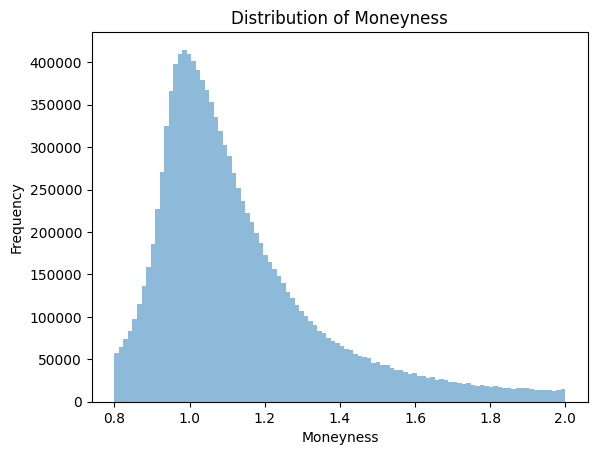

In [120]:
# Create a new column with the moneyness
df['Moneyness'] = df['Underlying_last'] / df['Strike']

# Plot the distribution of moneyness
df['Moneyness'].plot.hist(bins=100, alpha=0.5)

# Add labels
plt.xlabel("Moneyness")
plt.ylabel("Frequency")
plt.title("Distribution of Moneyness")
plt.show()

In [121]:
# Find bottom and top 5 percentiles of moneyness
print(df['Moneyness'].quantile([0.05, 0.95]))

0.05   0.88
0.95   1.62
Name: Moneyness, dtype: float64


<Axes: xlabel='Quote_date'>

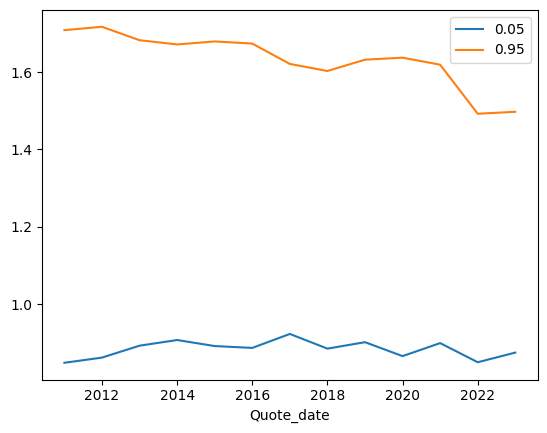

In [122]:
# Make quote date datetime
df['Quote_date'] = pd.to_datetime(df['Quote_date'])

# Plot botton and top 5 percentile of moneyness by year
df.groupby(df['Quote_date'].dt.year)['Moneyness'].quantile([0.05, 0.95]).unstack().plot()

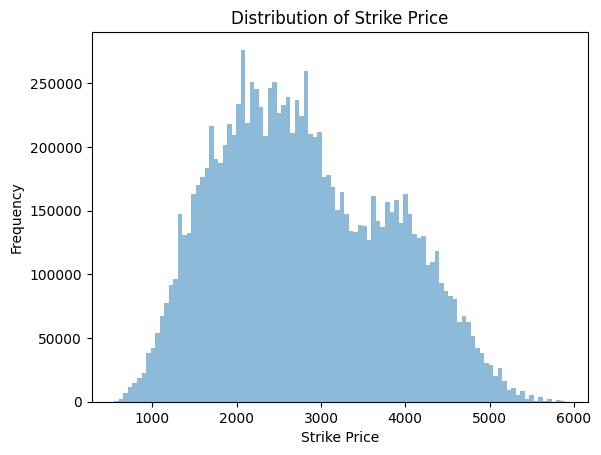

In [123]:
# Plot distribution of strike price
df['Strike'].plot.hist(bins=100, alpha=0.5)

# Add labels
plt.xlabel("Strike Price")
plt.ylabel("Frequency")
plt.title("Distribution of Strike Price")
plt.show()


In [124]:
df_y = df
df_y['Quote_date'] = pd.to_datetime(df['Quote_date'])
df_y = df_y.groupby(df_y['Quote_date'].dt.year).count()
df_y['cumulative_count'] = df_y['Price'].cumsum()
print(df_y[['Price', 'cumulative_count']])


              Price  cumulative_count
Quote_date                           
2011         172965            172965
2012         259343            432308
2013         345503            777811
2014         554101           1331912
2015         869602           2201514
2016         811805           3013319
2017         919659           3932978
2018        1249553           5182531
2019        1317848           6500379
2020        1454856           7955235
2021        1762541           9717776
2022        1750816          11468592
2023         402807          11871399


In [125]:
for i in range(1, 11):
    print(i, 500000/i)

1 500000.0
2 250000.0
3 166666.66666666666
4 125000.0
5 100000.0
6 83333.33333333333
7 71428.57142857143
8 62500.0
9 55555.555555555555
10 50000.0


In [126]:
pd.options.display.float_format = '{:.2f}'.format
# Drop the 'Unnamed: 0' column
df.drop(columns=['Unnamed: 0'], inplace=True)


# Extract the year from 'Quote_date' and create a new column 'Year'
df['Year'] = pd.to_datetime(df['Quote_date']).dt.year

# R to percent
df['R'] = df['R'] * 100

# Define years
years = list(range(2011, 2024))

# Initialize an empty DataFrame to store summary statistics
summary_stats = pd.DataFrame()

# Calculate summary statistics for each year
for year in years:
    mask = df['Year'] == year
    filtered_df = df[mask]
    
    stats = filtered_df.describe().loc[['count', 'mean', 'std']]
    stats.index = pd.MultiIndex.from_tuples([(year, idx) for idx in stats.index], names=['Year', 'Measure'])
    
    summary_stats = pd.concat([summary_stats, stats])

# Remove the 'Year' column from the summary statistics
summary_stats.drop(columns=['Year'], inplace=True)

# Reset the index and rename the columns
summary_stats = summary_stats.reset_index()

# Remove the index and rename 'Year (Measure)' column to 'Year'
summary_stats.index.name = None

# Set the display options to show the full DataFrame without truncation
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

# Create a custom function to display the year only in the first row of the year
def display_year_only_in_first_row(x):
    current_year = None
    formatted_rows = []

    for row in x.iterrows():
        year, measure = row[1]["Year"], row[1]["Measure"]
        if current_year != year:
            current_year = year
            formatted_rows.append((year, measure))
        else:
            formatted_rows.append(("", measure))

    return pd.DataFrame(formatted_rows, columns=["Year", "Measure"])

# Apply the custom function
summary_stats[["Year", "Measure"]] = display_year_only_in_first_row(summary_stats)

# Avoid scientific notation
summary_stats[["Underlying_last", "R", "TTM", "Moneyness", "Strike", "Price"]] = summary_stats[["Underlying_last", "R", "TTM", "Moneyness", "Strike", "Price"]].applymap(lambda x: f'{float(x):.2f}')
summary_stats.rename(columns={"Underlying_last": "S&P 500", "R": "Rate", "TTM": "Maturity (Years)", "Moneyness": "Moneyness", "Strike": "Strike", "Price": "Option price"}, inplace=True)



# Format numeric columns to have exactly two decimal places
numeric_columns = summary_stats.columns[2:]

# Print the summary statistics as a LaTeX table and print every row
print(tabulate(summary_stats, tablefmt='latex', headers=summary_stats.columns, showindex=False))


\begin{tabular}{llrrrrrr}
\hline
 Year   & Measure   &     Option price &          S\&P 500 &           Strike &   Maturity (Years) &             Rate &        Moneyness \\
\hline
 2011   & count     & 172965           & 172965           & 172965           &   172965           & 172965           & 172965           \\
        & mean      &    183.64        &   1265.06        &   1134.68        &        0.33        &      0.07        &      1.17        \\
        & std       &    174.19        &     64.56        &    231.75        &        0.41        &      0.09        &      0.27        \\
 2012   & count     & 259343           & 259343           & 259343           &   259343           & 259343           & 259343           \\
        & mean      &    191.6         &   1383.49        &   1239.55        &        0.34        &      0.1         &      1.17        \\
        & std       &    187.5         &     45.79        &    245.32        &        0.42        &      0.05        &      0